# Algotytm przecinania się odcinków na płaszczyźnie

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [25]:
def draw_example_1():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()

def visualize_lines(lines):
    vis = Visualizer()
    vis.add_line_segment(lines)
    vis.add_point([lines[i // 2][i % 2] for i in range(2 * len(lines))], s = 5)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

In [20]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

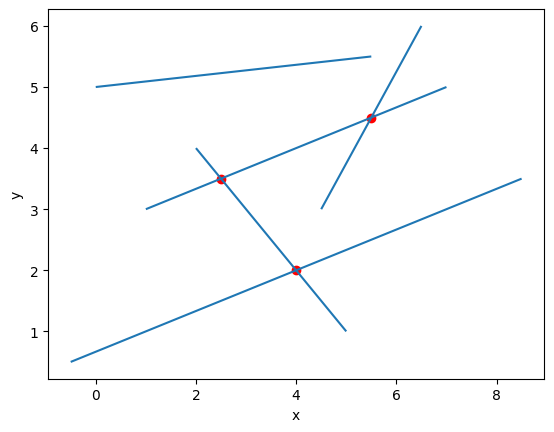

In [4]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [1]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    lines = []
    x_set = set()

    while len(lines) < n:
        x_1 = np.random.uniform(0, max_x)
        if not x_1 in x_set:
            x_2 = np.random.uniform(0, max_x)
            if x_1 != x_2 and x_2 not in x_set:
                x_set.add(x_1)
                x_set.add(x_2)
                y_1 = np.random.uniform(0, max_y)
                y_2 = np.random.uniform(0, max_y)
                lines.append(((x_1, y_1), (x_2,y_2)))

    return lines


In [6]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.261s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [21]:
section = generate_uniform_sections(1000,1000, 20)

Zwizualizuj otrzymane odcinki

In [26]:
visualize_lines(section)

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką

In [23]:
%matplotlib tk

interactive_sections = []
xs_set = set()
active = True
curr_points = []

def draw_point(point):
    """
    Umieszcza punkt o danych współrzędnych na płaszczyźnie.
    :param point: krotka (x, y) określająca położenie punktu
    """
    plt.scatter(point[0], point[1], color="red")
    plt.show()

def draw_line(points):
    """
    Tworzy linię łączącą dwa punkty na płaszczyźnie.
    :param points: lista krotek reprezentujących punkty, pomiędzy którymi dodajemy krawędź
    """
    ax = plt.gca()
    x = [points[0][0], points[1][0]]
    y = [points[0][1], points[1][1]]
    line = ax.plot(x, y, color="red") 
    ax.figure.canvas.draw()        

def onclick(event):
    """
    Obsługuje interakcję z myszą:
    - podwójne kliknięcie lewym przyciskiem dodaje nowy punkt
    - podwójne kliknięcie prawym przyciskiem kończy tworzenie wielokąta
    :param event: obiekt zawierający dane o zdarzeniu myszy
    """
    global active
    global curr_points

    if event.dblclick and active:
        if event.button == 1:
            x = event.xdata
            y = event.ydata
            if x in xs_set:
                ax.set_title("Współrzędne x-owe punktów nie mogą się powtarzać!")
                plt.pause(1.5)
                ax.set_title("Kliknij dwukrotnie, aby dodać punkt.\nKażda kolejna para punktów stworzy odcinek")
            else:
                xs_set.add(x)
                curr_points.append((x, y))
                draw_point((x, y))
                if len(curr_points) == 2:
                    draw_line(curr_points)
                    interactive_sections.append((curr_points[0], curr_points[1]))
                    curr_points = []
        elif event.button == 3:
            if len(interactive_sections) < 2:
                ax.set_title("Wymagane co najmniej 2 odcinki!")
                plt.pause(1.5)
                ax.set_title("Podwójne kliknięcie LPM: dodaj punkt\nPodwójne kliknięcie PPM: zakończ\nKażda kolejna para punktów stworzy odcinek")
            else:
                active = False
                plt.pause(0.5)
                ax.set_title("Odcinki zostały utworzone. Zamykanie okna...")
                plt.pause(2)
                plt.close()

fig, ax = plt.subplots()
plt.get_current_fig_manager().set_window_title("Kreator odcinków")
ax.set_title("Podwójne kliknięcie LPM: dodaj punkt\nPodwójne kliknięcie PPM: zakończ\nKażda kolejna para punktów stworzy odcinek")
connection_id = fig.canvas.mpl_connect("button_press_event", onclick)
ax.set_xlim([0,2])
ax.set_ylim([0,2])
ax.aspect = 1
plt.tight_layout()
plt.ion()
plt.show()


In [27]:
visualize_lines(interactive_sections)

Uzupełnij funkcję ```is_intersection```

In [ ]:
def is_intersection(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """
    raise Exception("Unimplemented")

In [ ]:
Test().runtest(2, is_intersection)

### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

In [ ]:
# Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [ ]:
def is_intersection_with_visualization(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    raise Exception("Unimplemented")

Uzupełnij funkcję ```find_intersections```

In [ ]:
def find_intersections(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    raise Exception("Unimplemented")

In [ ]:
Test().runtest(3, find_intersections)

Uzupełnij funkcję ```find_intersections_with_visualization```

In [ ]:
def find_intersections_with_visualization(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

In [ ]:
# Odpowiedź here

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

In [ ]:
# Odpowiedź here

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [ ]:
# testing_sections = ???

In [ ]:
### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

In [ ]:
# Odpowiedź here

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.